   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

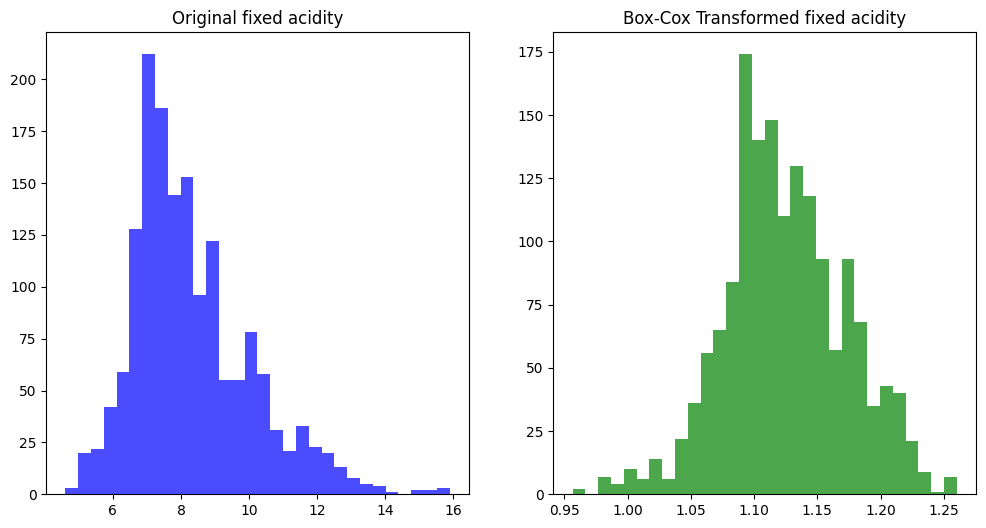

Box-Cox transformation lambda: -0.6686169647102252


In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# 下载数据集并加载到pandas数据框Загрузите набор данных и загрузите его во фрейм данных pandas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 查看数据集的前5行Просмотрите первые 5 строк набора данных
print(data.head())

# 选择一个数值特征进行Box-Cox转换，例如'fixed acidity'Выберите числовой параметр для преобразования Бокс-кокса, например "фиксированная кислотность"
feature = 'fixed acidity'

# 确保所有值都是正数Убедитесь, что все значения положительные
data[feature] = data[feature] + 1e-6

# 进行Box-Cox转换Выполнить преобразование Box-Cox
data[feature + '_boxcox'], fitted_lambda = stats.boxcox(data[feature])

# 绘制转换前后的直方图对比Сравните гистограмму до и после преобразования
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data[feature], bins=30, color='blue', alpha=0.7)
plt.title(f'Original {feature}')

plt.subplot(1, 2, 2)
plt.hist(data[feature + '_boxcox'], bins=30, color='green', alpha=0.7)
plt.title(f'Box-Cox Transformed {feature}')

plt.show()

print(f"Box-Cox transformation lambda: {fitted_lambda}")
